In [62]:
pip install py-AutoClean

In [63]:

import pandas as pd
from AutoClean import AutoClean
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
data = pd.read_csv('/content/Cleaned_HR_Data_Analysis.csv')


In [65]:
cleaned_data = AutoClean(
    data,
    mode = 'manual',
    missing_num="auto",  # Impute missing numerical data
    missing_categ='auto',  # Impute missing categorical data
    duplicates = 'auto',
)

AutoClean process completed in 0.031954 seconds
Logfile saved to: /content/autoclean.log


In [66]:
df_cleaned = cleaned_data.output

In [67]:
df_cleaned

,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,...,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
0,3427,20-Sep-19,Production Technician I,CCDR,Active,Contract,Zone C,Temporary,Production,Finance & Accounting,...,1,2,3,15-Jul-23,Leadership Development,Internal,Failed,2,606.11,50
1,3428,11-Feb-23,Production Technician I,EW,Active,Contract,Zone A,Part-Time,Production,Aerial,...,2,1,5,12-Sep-22,Customer Service,External,Incomplete,4,673.02,58
2,3429,10-Dec-18,Area Sales Manager,PL,Active,Full-Time,Zone B,Part-Time,Sales,General - Sga,...,1,2,1,13-Aug-22,Leadership Development,External,Failed,2,413.28,27
3,3430,21-Jun-21,Area Sales Manager,CCDR,Active,Contract,Zone A,Full-Time,Sales,Finance & Accounting,...,5,5,4,15-Dec-22,Project Management,External,Completed,3,663.78,23
4,3431,29-Jun-19,Area Sales Manager,TNS,Active,Contract,Zone A,Temporary,Sales,General - Con,...,2,5,3,13-Jul-23,Technical Skills,External,Failed,5,399.03,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,3421,09-May-22,Production Technician I,PL,Active,Part-Time,Zone A,Part-Time,Production,Wireless,...,5,4,2,22-Jan-23,Customer Service,External,Passed,1,786.71,63
2841,3423,28-Dec-20,Production Technician I,SVG,Active,Part-Time,Zone A,Full-Time,Production,Engineers,...,4,5,3,14-Oct-22,Technical Skills,External,Completed,1,439.65,19
2842,3424,09-Dec-20,Production Technician I,TNS,Terminated,Contract,Zone B,Temporary,Production,Wireline Construction,...,2,4,5,18-Aug-22,Project Management,Internal,Completed,5,981.13,23
2843,3425,28-May-19,Production Technician I,WBL,Terminated,Contract,Zone B,Full-Time,Production,Aerial,...,5,2,3,19-May-23,Technical Skills,External,Completed,3,184.27,65


# **1️⃣ Employee Satisfaction & Engagement (Survey-Based)**


 **Engagement Score Analysis:**
count      2845.0
mean     2.941652
std       1.43523
min           1.0
25%           2.0
50%           3.0
75%           4.0
max           5.0
Name: Engagement Score, dtype: Float64


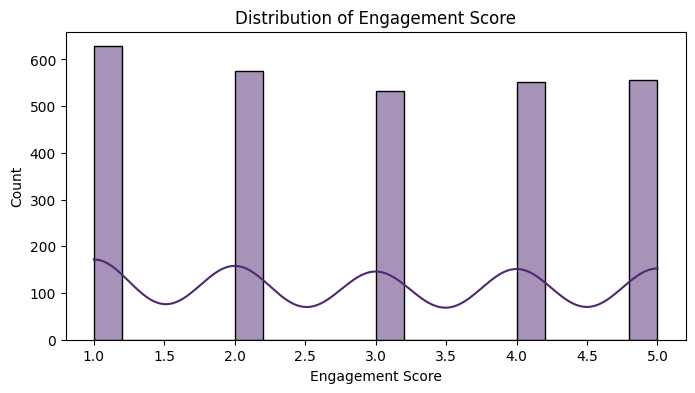

 **Satisfaction Score Analysis:**
count      2845.0
mean     3.028471
std      1.410067
min           1.0
25%           2.0
50%           3.0
75%           4.0
max           5.0
Name: Satisfaction Score, dtype: Float64


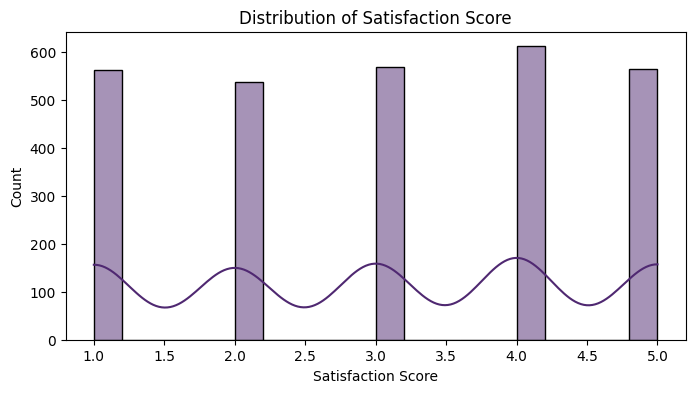

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_satisfaction_engagement(df):

    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        if 'satisfaction' in col.lower() or 'engagement' in col.lower():
            print(f" **{col} Analysis:**")
            print(df[col].describe())

            plt.figure(figsize=(8, 4))
            sns.histplot(df[col], bins=20, kde=True, color='#4F2871')
            plt.xlabel(col.replace("_", " ").title())
            plt.title(f"Distribution of {col}")
            plt.show()


analyze_satisfaction_engagement(df_cleaned)


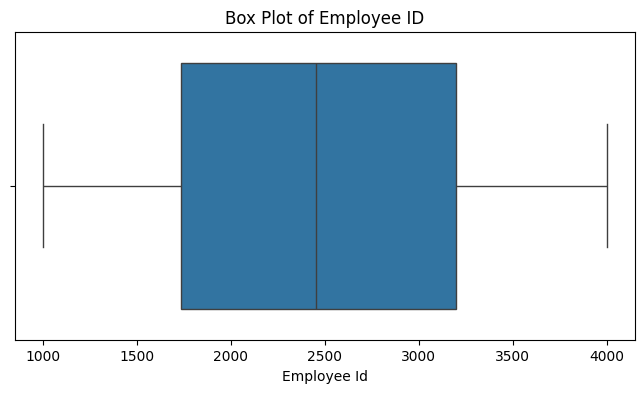

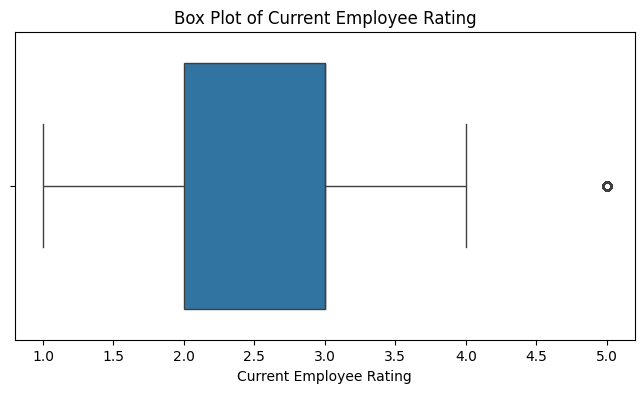

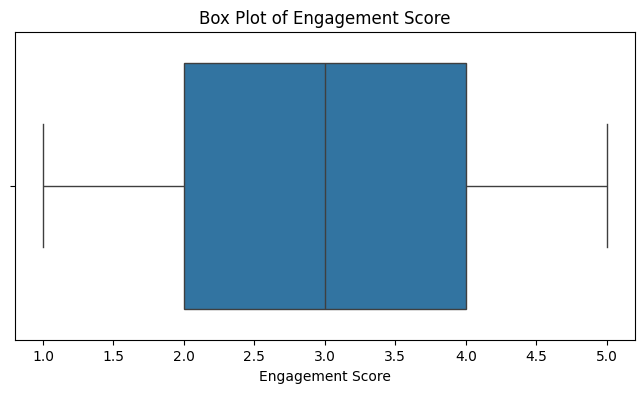

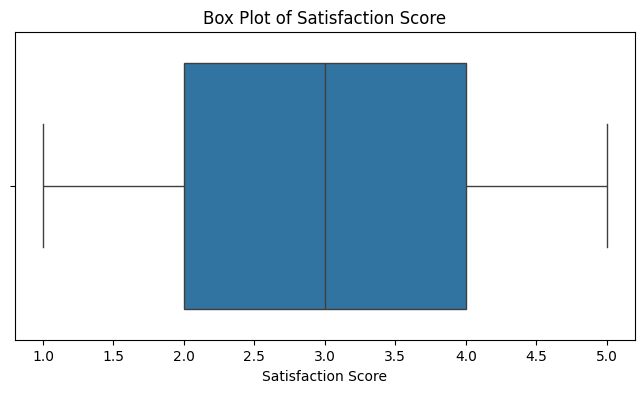

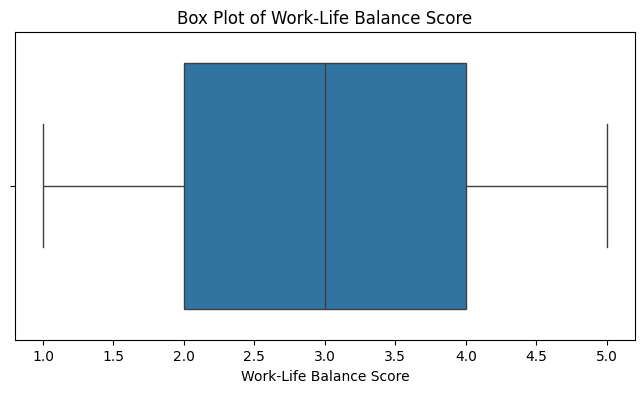

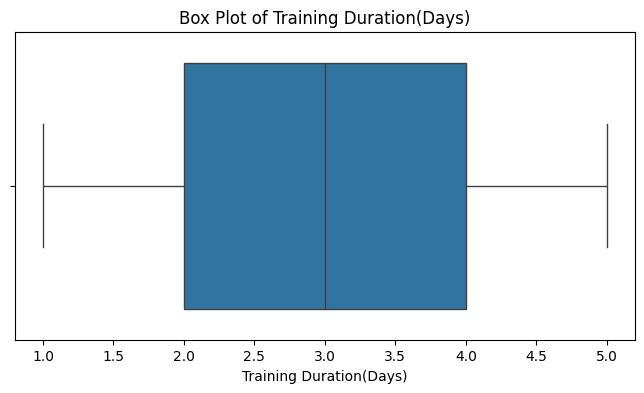

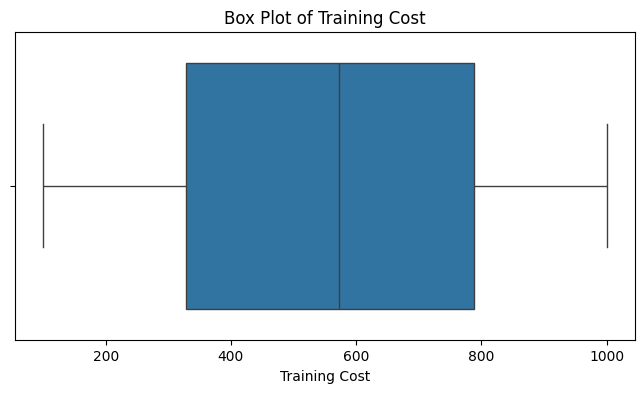

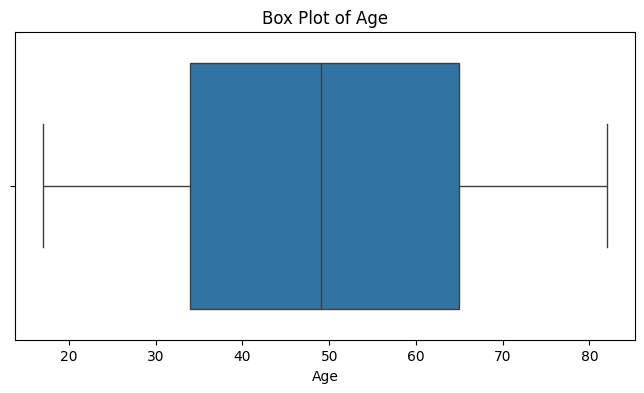

In [86]:
# box plot the df-cleaned
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot_df(df):

    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.xlabel(col.replace("_", " ").title())
        plt.title(f"Box Plot of {col}")
        plt.show()

box_plot_df(df_cleaned)

# **2️⃣ Cost Per Hire**
Formula:

Cost per Hire
=
Total Hiring Costs /
Total Hires

​

This function detects:



*   Monetary hiring costs
*   Number of new hires






In [69]:
def calculate_cost_per_hire(df):
    """Detects hiring cost and new hire count to compute cost per hire."""
    numeric_cols = df.select_dtypes(include=['number']).columns

    total_cost = None
    total_hires = None

    for col in numeric_cols:
        if 'cost' in col.lower() and 'hire' in col.lower():
            total_cost = df[col].sum()
        elif 'hire' in col.lower() and 'count' in col.lower():
            total_hires = df[col].sum()

    if total_cost and total_hires:
        cost_per_hire = total_cost / total_hires
        print(f" **Cost per Hire:** ${cost_per_hire:.2f}")
    else:
        print(" Could not detect hiring cost and/or hire count.")



 Could not detect hiring cost and/or hire count.


# **3️⃣ Absenteeism Rate**
Formula:

Absenteeism Rate
=
Total Absent Days/
Total Work Days
×
100


In [70]:
def calculate_absenteeism_rate(df):
    """Detects absence-related data and calculates absenteeism rate."""
    numeric_cols = df.select_dtypes(include=['number']).columns

    total_absent_days = None
    total_work_days = None

    for col in numeric_cols:
        if 'absent' in col.lower():
            total_absent_days = df[col].sum()
        elif 'work' in col.lower() and 'days' in col.lower():
            total_work_days = df[col].sum()

    if total_absent_days and total_work_days:
        absenteeism_rate = (total_absent_days / total_work_days) * 100
        print(f" **Absenteeism Rate:** {absenteeism_rate:.2f}%")
    else:
        print(" Could not detect absenteeism data.")



 Could not detect absenteeism data.


# **4️⃣ Employee Growth Rate**
Formula:

Growth Rate
=
New Employees
−
Departed Employees/
Previous Employees
×
100


In [71]:
def calculate_employee_growth_rate(df):
    """Detects employee hiring & departure data to compute growth rate."""
    numeric_cols = df.select_dtypes(include=['number']).columns

    new_hires = None
    departures = None
    previous_count = None

    for col in numeric_cols:
        if 'new' in col.lower() and 'hire' in col.lower():
            new_hires = df[col].sum()
        elif 'depart' in col.lower() or 'left' in col.lower():
            departures = df[col].sum()
        elif 'total' in col.lower() and 'employee' in col.lower():
            previous_count = df[col].iloc[0]  # Assuming it's cumulative over time

    if new_hires and departures and previous_count:
        growth_rate = ((new_hires - departures) / previous_count) * 100
        print(f" **Employee Growth Rate:** {growth_rate:.2f}%")
    else:
        print(" Could not detect sufficient growth data.")



 Could not detect sufficient growth data.


# **5️⃣ Retention Rate**
Formula:

Retention Rate
=
(
1
−
Employees Left/
Total Employees
)
×
100



In [72]:
def calculate_retention_rate(df):
    """Detects employee departures & total count to compute retention rate."""
    numeric_cols = df.select_dtypes(include=['number']).columns

    total_employees = None
    employees_left = None

    for col in numeric_cols:
        if 'total' in col.lower() and 'employee' in col.lower():
            total_employees = df[col].max()
        elif 'left' in col.lower() or 'turnover' in col.lower():
            employees_left = df[col].sum()

    if total_employees and employees_left:
        retention_rate = (1 - (employees_left / total_employees)) * 100
        print(f" **Retention Rate:** {retention_rate:.2f}%")
    else:
        print(" Could not detect retention data.")



 Could not detect retention data.


# **6️⃣ Revenue per Employee**
Formula:

Revenue per Employee
=
Total Revenue /
Total Employees

​


In [73]:
def calculate_revenue_per_employee(df):
    """Detects revenue & employee count to compute revenue per employee."""
    numeric_cols = df.select_dtypes(include=['number']).columns

    total_revenue = None
    total_employees = None

    for col in numeric_cols:
        if 'revenue' in col.lower():
            total_revenue = df[col].sum()
        elif 'total' in col.lower() and 'employee' in col.lower():
            total_employees = df[col].max()

    if total_revenue and total_employees:
        revenue_per_employee = total_revenue / total_employees
        print(f" **Revenue per Employee:** ${revenue_per_employee:.2f}")
    else:
        print(" Could not detect revenue or employee count.")



 Could not detect revenue or employee count.


# **Identify Anomalies in Employee Turnover**

In [74]:
def detect_turnover_anomalies(df):
    """Detects anomalies in employee turnover trends."""

    numeric_cols = df.select_dtypes(include=['number']).columns
    turnover_col = None

    # Find a turnover-related column
    for col in numeric_cols:
        if 'turnover' in col.lower() or 'left' in col.lower():
            turnover_col = col
            break

    if turnover_col is None:
        print(" No turnover column detected!")
        return

    # Calculate IQR for anomaly detection
    Q1 = df[turnover_col].quantile(0.25)
    Q3 = df[turnover_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    anomalies = df[(df[turnover_col] < lower_bound) | (df[turnover_col] > upper_bound)]

    # Plot turnover trend with anomalies
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=df, x=df.index, y=turnover_col, label="Turnover Rate", color='b')
    sns.scatterplot(data=anomalies, x=anomalies.index, y=turnover_col, color='r', label="Anomalies", s=100)

    plt.title(" Employee Turnover Anomalies")
    plt.legend()
    plt.show()

    return anomalies



 No turnover column detected!


# **1️⃣ Training Completion Rate**
🔹 Formula:

Training Completion Rate
=
Employees who completed training /
Total employees enrolled
×
100


In [75]:
def training_completion_rate(df):
    """Calculates the Training Completion Rate."""

    completed_col, enrolled_col = None, None

    for col in df.columns:
        if 'completed' in col.lower() and 'training' in col.lower():
            completed_col = col
        if 'enrolled' in col.lower() and 'training' in col.lower():
            enrolled_col = col

    if not completed_col or not enrolled_col:
        print(" Training completion or enrollment column not found!")
        return None

    rate = (df[completed_col].sum() / df[enrolled_col].sum()) * 100
    print(f" Training Completion Rate: {rate:.2f}%")
    return rate


 Training completion or enrollment column not found!


# **Time to Completion**

In [76]:
def average_training_time(df):
    """Calculates the average time taken to complete training."""

    duration_col = None

    for col in df.columns:
        if 'Training Duration(Days)' in col.lower() and 'Training Program Name' in col.lower():
            duration_col = col
            break

    if not duration_col:
        print(" Training time column not found!")
        return None

    avg_time = df[duration_col].mean()
    print(f" Average Training Completion Time: {avg_time:.2f} days")
    return avg_time


 Training time column not found!


# **Training Expenses per Employee**
🔹 Formula:

Training Expenses per Employee
=
Total Training Cost /
Total Employees



In [80]:
def training_expenses_per_employee(df):
    """Calculates training expenses per employee."""

    cost_col, employee_col = None, None

    for col in df.columns:
        if 'Employee ID' in col.lower() and 'Training Cost' in col.lower():
            cost_col = col
        if 'Employee ID' in col.lower() and 'count' in col.lower():
            employee_col = col

    if not cost_col or not employee_col:
        print("Training cost or employee count column not found!")
        return None

    expense = df[cost_col].sum() / df[employee_col].sum()
    print(f"Training Expenses per Employee: ${expense:.2f}")
    return expense


Training cost or employee count column not found!


In [82]:
def employee_performance(df):
    """Calculates the average employee performance score."""

    performance_col = None

    for col in df.columns:
        if 'Current Employee Rating' in col.lower() and 'Employee ID' in col.lower():
            performance_col = col
            break

    if not performance_col:
        print(" Employee performance column not found!")
        return None

    avg_score = df[performance_col].mean()
    print(f" Average Employee Performance Score: {avg_score:.2f}")
    return avg_score


 Employee performance column not found!


In [85]:
def revenue_per_employee(df):
    """Calculates revenue per employee."""

    revenue_col, employee_col = None, None

    for col in df.columns:
        if 'revenue' in col.lower():
            revenue_col = col
        if 'employee' in col.lower() and 'count' in col.lower():
            employee_col = col

    if not revenue_col or not employee_col:
        print("Revenue or employee count column not found!")
        return None

    revenue = df[revenue_col].sum() / df[employee_col].sum()
    print(f"Revenue per Employee: ${revenue:.2f}")
    return revenue


In [ ]:
def absence_rate(df):
    """Calculates employee absence rate."""

    absence_col, workdays_col = None, None

    for col in df.columns:
        if 'absence' in col.lower() and 'days' in col.lower():
            absence_col = col
        if 'work' in col.lower() and 'days' in col.lower():
            workdays_col = col

    if not absence_col or not workdays_col:
        print("Absence or workdays column not found!")
        return None

    rate = (df[absence_col].sum() / df[workdays_col].sum()) * 100
    print(f"Absence Rate: {rate:.2f}%")
    return rate


In [ ]:
def absence_rate_per_manager(df):
    """Calculates absence rate grouped by manager or department."""

    manager_col, absence_col = None, None

    for col in df.columns:
        if 'manager' in col.lower() or 'department' in col.lower():
            manager_col = col
        if 'absence' in col.lower():
            absence_col = col

    if not manager_col or not absence_col:
        print("Manager or absence column not found!")
        return None

    result = df.groupby(manager_col)[absence_col].mean().reset_index()
    print("Absence Rate per Manager:")
    print(result)
    return result


In [ ]:
def overtime_hours(df):
    """Calculates the average overtime hours per employee."""

    overtime_col = None

    for col in df.columns:
        if 'overtime' in col.lower() and 'hours' in col.lower():
            overtime_col = col
            break

    if not overtime_col:
        print(" Overtime hours column not found!")
        return None

    avg_overtime = df[overtime_col].mean()
    print(f"Average Overtime Hours: {avg_overtime:.2f} hours")
    return avg_overtime
